#                                                     NLTK

## 1- Import

In [5]:
from urllib.request import Request, urlopen

## 2 - Data

In [37]:
link = Request('https://www.gospelprime.com.br/billy-graham-registrou-interesse-da-rainha-da-inglaterra-pela-biblia-sagrada/',headers={'User-Agent': 'Mozilla/5.0'})
pagina = urlopen(link).read().decode('utf-8', 'ignore')

1- Vamos começar fazendo o import das funções Request e urlopen da biblioteca urllib.request (urllib2 no Python 2).

2- Agora vamos utilizar essas funções para ler uma notícia do site Último Segundo. As informações retornadas serão armazenadas em uma variável chamada pagina.

3- Hora de utilizar o BeautifulSoap para garimpar a página e pegar apenas o que nos interessa. Nessa etapa é importante saber que o código depende da estrutura da página que estamos garimpando, ou seja, é preciso modificá-lo para garimpar outras páginas. No site do Último Segundo as notícias ficam dentro de uma DIV com ID=noticia, como vocês podem notar na imagem:

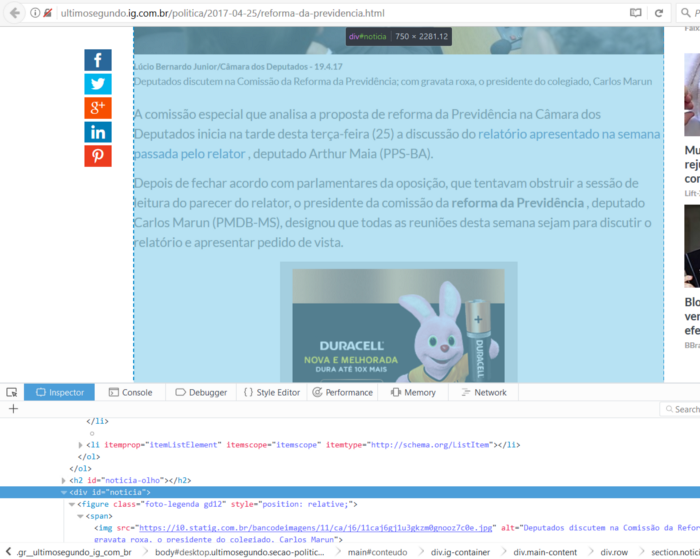

Então o que vamos fazer é realizar uma busca pelos elementos que possuem id=noticia. Assim a gente consegue fazer um filtro e pegar apenas a notícia no site.

In [38]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(pagina, "lxml")
texto = soup.find(id="mvp-article-wrap").text

4- Chegou o momento de aplicarmos o processamento sobre linguagens naturais para tratar o texto extraído da notícia do site. Vamos começar importando algumas funcionalidades da biblioteca NLTK:

In [39]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

Agora vamos dividir o nosso texto em sentenças e depois em palavras:

In [40]:
sentencas = sent_tokenize(texto)
palavras = word_tokenize(texto.lower())

5- Um detalhe muito importante no processamento de linguagens naturais é identificar as chamadas stopwords do idioma. Stopword nada mais é que uma palavra que possui apenas significado sintático dentro da sentença, porém não traz informações relevantes sobre o seu sentido. As stopwords possuem uma frequência muito grande em todos os idiomas e por esse motivo precisamos eliminá-las das palavras que extraímos do texto. Caso contrário, nosso algoritmo poderia dar importância para palavras como: “e”, “ou”, “para”….e isso certamente atrapalharia nossa análise.

ATENÇÃO: O processo de “tokenização” do NLTK considera as pontuações do texto como tokens também e por isso não podemos deixar de retirá-los também!

Retirando as stopwords da nossa lista de palavras:

In [41]:
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words('portuguese') + list(punctuation))
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]

Veja que utilizamos SET (não permite elementos repetidos) e também compreensão de lista. Temos que configurar o idioma das stopwords que queremos, no caso português. Retiramos também todas as pontuações utilizando ponctuation da biblioteca string.

Agora temos nossa lista de palavras do texto sem as stopwords, armazenada na variável palavras_sem_stopwords.

6- Hora de criar a nossa distribuição de frequência para essa lista de palavras e descobrir quais são as mais importantes. Para isso, vamos utilizar a função FreqDist da biblioteca nltk.probability:

In [42]:
from nltk.probability import FreqDist
frequencia = FreqDist(palavras_sem_stopwords)

7- Vamos agora separar quais são as sentenças mais importantes do nosso texto. Criaremos um “score” para cada sentença baseado no número de vezes que uma palavra importante se repete dentro dela. Vamos utilizar um dicionário especial chamado defaultdict da biblioteca collections. A principal diferença para um dicionário comum é que ele não lança uma exceção quando você pesquisa por uma chave inexistente (KeyError). Ao contrário, ele adiciona essa chave no dicionário!

In [43]:
from collections import defaultdict
sentencas_importantes = defaultdict(int)

Hora de popular o nosso dicionário. Vamos criar um looping para percorrer todas as sentenças e coletar todas as estatísticas:

In [44]:
for i, sentenca in enumerate(sentencas):
    for palavra in word_tokenize(sentenca.lower()):
        if palavra in frequencia:
            sentencas_importantes[i] += frequencia[palavra]

Note que o código acima popula o dicionário com o índice da sentença (key) e a soma da frequência de cada palavra presente na sentença (value).

9- Pronto! De posse dessas informações, podemos selecionar no nosso dicionário as “n” sentenças mais importantes para formar o nosso resumo. Para facilitar a nossa vida, vamos usar a funcionalidade nlargest da biblioteca heapq:

In [45]:
from heapq import nlargest
idx_sentencas_importantes = nlargest(4, sentencas_importantes, sentencas_importantes.get)

No código acima, eu escolhi as 4 sentenças mais importantes!

10- Finalmente podemos criar o nosso resumo:

In [46]:
for i in sorted(idx_sentencas_importantes):
    print(sentencas[i])

2 minutos atrás em 13 de setembro de 2022



Por Redação 




 



Billy Graham e a rainha da Inglaterra (Foto: Reprodução/Associação Evangelística Billy Graham)






Billy Graham e rainha Elizabeth II desenvolveram amizade por longos anos, e os encontros de fé que tiveram foram registrados no livro do evangelista intitulado “Just As I Am” (Assim como eu sou).
De acordo Billy Graham, a razão pela qual a Rainha Elizabeth II tinha interesse espiritual foi “a fé calorosa de sua mãe, Sua Majestade a Rainha Elizabeth, a Rainha Mãe.”
“A primeira vez que estivemos com ela foi na Clarence House, sua residência em Londres.
Frank Graham, filho de Billy Graham relembrou fatos protagonizados pela rainha que o marcaram, especialmente no falecimento de seu pai:
PUBLICIDADE



PUBLICIDADE


“Quando meu pai, Billy Graham, faleceu há quatro anos, tive a honra de receber uma carta de condolências de Sua Majestade a Rainha Elizabeth II.
»


 


RelacionadosBilly GrahamDestaques















Confira ta